# **Importing the libraries**

In [186]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image
import cv2

# **Loading the Images**

In [199]:
X = []
Y = []

for i in tqdm(glob('../../datasets/Dataset/train/Open_Eyes/*')):
    # temp = np.array(Image.open(i).resize((128,128)))
    temp = np.array(cv2.resize(cv2.imread(i, cv2.IMREAD_GRAYSCALE), (128, 128)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('../../datasets/Dataset/train/Closed_Eyes/*')):
    # temp = np.array(Image.open(i).resize((128,128)))
    temp = np.array(cv2.resize(cv2.imread(i, cv2.IMREAD_GRAYSCALE), (128, 128)))
    X.append(temp)
    Y.append(0)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 3173.27it/s]


# **Normalizing the images using Min-Max Scaling algorithm**

In [201]:
X = (np.array(X) - np.min(X)) / (np.max(X) - np.min(X))
X = X/255.0
Y = np.array(Y)
# Y = (np.array(Y) - np.min(Y)) / (np.max(Y) - np.min(Y))

# Expanding the dimensions of array (numpy)

In [202]:
X = np.expand_dims(X,-1)
X.shape

(4000, 128, 128, 1)

# Spliting the dataset into training and testing data

In [203]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# CNN Model

In [10]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

# model = tf.keras.models.Sequential([
#       Input(shape=(64, 64, 1)),

#       Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
#       Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
#       BatchNormalization(),
#       MaxPooling2D(strides = 2),
#       Dropout(0.3),

#       Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
#       Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
#       BatchNormalization(),
#       MaxPooling2D(strides = 2),
#       Dropout(0.3),

#       Flatten(),
#       Dense(units  = 256, activation = 'relu', use_bias=False),
#       BatchNormalization(),

#       Dense(units = 128, use_bias=False, activation = 'relu'),

#       Dense(units = 84, use_bias=False, activation = 'relu'),
#       BatchNormalization(),
#       Dropout(0.3),

#       Dense(units = 1, activation = 'sigmoid')
#   ])

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape= (128, 128, 1)),

    Conv2D(filters = 32, kernel_size = 3, strides = 1, activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters = 64, kernel_size = 3, strides = 1, activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters = 128, kernel_size = 3, strides = 1, activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters = 128, kernel_size = 3, strides = 1, activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

# Compiling the Model

In [206]:
# model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [207]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,600,577 (9.92 MB)

 Trainable params: 2,600,577 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

# Training of the Model

In [208]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=callback)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.5009 - loss: 0.6931
Epoch 1: val_loss improved from inf to 0.69226, saving model to bestModel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.5012 - loss: 0.6931 - val_accuracy: 0.4813 - val_loss: 0.6923
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5595 - loss: 0.6872
Epoch 2: val_loss improved from 0.69226 to 0.62822, saving model to bestModel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.5600 - loss: 0.6870 - val_accuracy: 0.6847 - val_loss: 0.6282
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7111 - loss: 0.5938
Epoch 3: val_loss improved from 0.62822 to 0.46004, saving model to bestModel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.7112 - loss: 0.5934 - val_accuracy: 0.8134 - val_loss: 0.4600
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.7805 - loss: 0.4693
Epoch 4: val_loss improved from 0.46004 to 0.32345, sa

# Model Evaluation

In [209]:
model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9627 - loss: 0.1220


[0.12564437091350555, 0.9628787636756897]

# Loading the Model Performance

In [210]:
from keras.models import load_model
best_model = load_model('bestModel.keras')
best_model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9614 - loss: 0.1267


[0.1312418431043625, 0.9613636136054993]

# Changing the dimensions and Plotting the trained images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


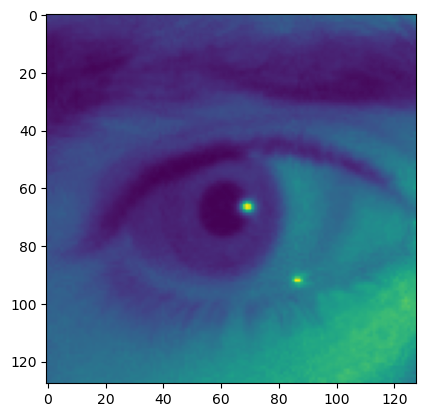

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


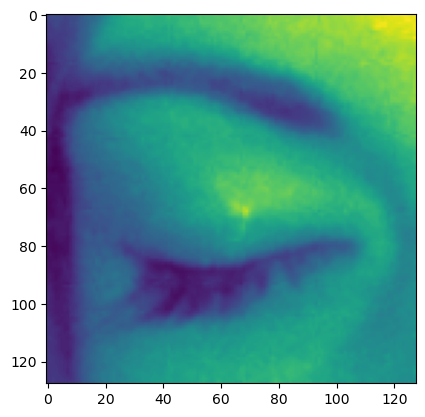

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


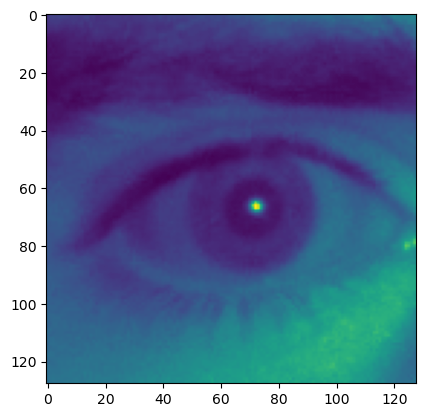

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


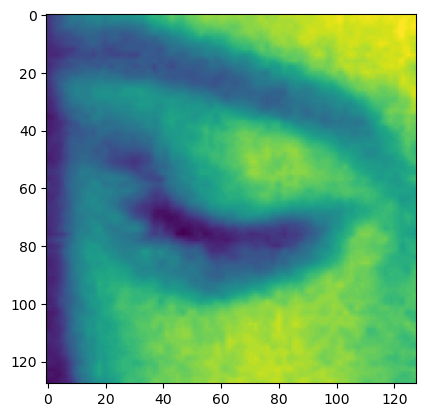

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


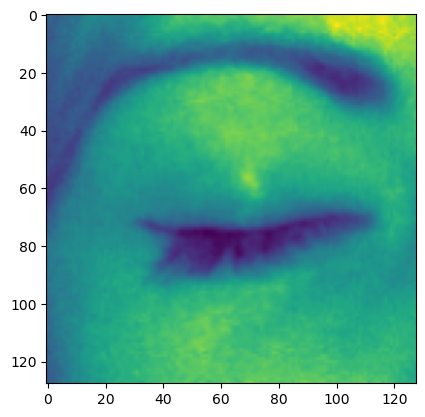

Closed


In [211]:
for i in x_test[0:5]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

# Prediction and Confusion Matrix

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


Text(0.5, 25.722222222222214, 'Actual')

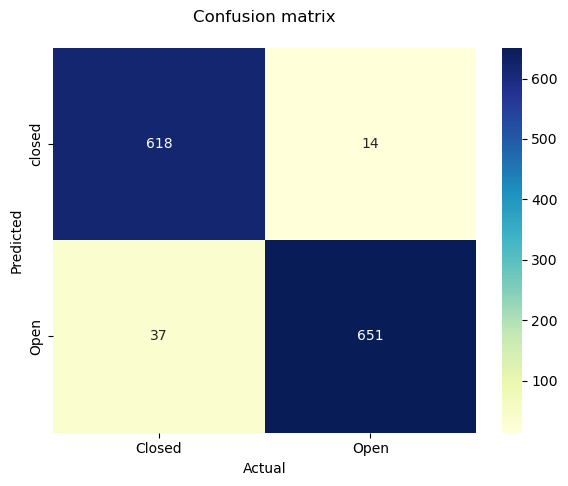

In [212]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

# Accuracy

Evaluating the Accuracy

In [213]:
accuracy = best_model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9614 - loss: 0.1267
Accuracy: 0.9613636136054993


## Testing the model using the webcam

In [214]:
import cv2
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [235]:
def preprocess_image(image_path):
    # Read the image
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Detect eyes in the image
    eyes = eye_cascade.detectMultiScale(gray, 1.2, 5)
    
    return gray, eyes

In [222]:
def extract_and_resize_eyes(gray_image, eyes):
    eye_images = []
    
    for (ex, ey, ew, eh) in eyes:
        # Extract the region of the eye
        eye = gray_image[ey:ey+eh, ex:ex+ew]
        
        # Resize to 64x64
        eye_resized = cv2.resize(eye, (128, 128))
        
        # Normalize the pixel values to [0, 1]
        eye_resized = (np.array(eye_resized) - np.min(eye_resized)) / (np.max(eye_resized) - np.min(eye_resized))
        eye_resized = eye_resized / 255.0
        
        # Expand dimensions to match the model input shape (64, 64, 1)
        eye_resized = np.expand_dims(eye_resized, axis=-1)
        
        eye_images.append(eye_resized)
    
    return eye_images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


0.9995834

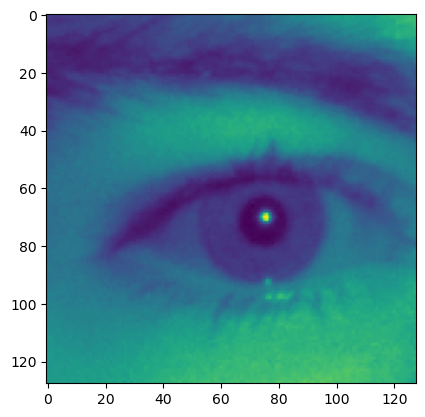

In [223]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(x_test[50])
best_model.predict(np.expand_dims(x_test[0], 0), verbose=1)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


0.99993837

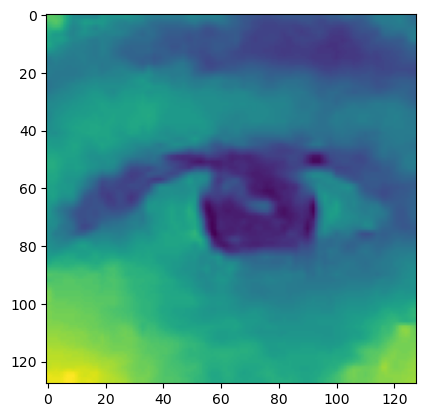

In [238]:
import numpy as np
import matplotlib.pyplot as plt

gray, eyes = preprocess_image('pics/opened/1.jpg')
eyes_images = extract_and_resize_eyes(gray, eyes)
len(eyes_images)
plt.imshow(eyes_images[0])
best_model.predict(np.expand_dims(eyes_images[0], 0), verbose=1)[0][0]